In [51]:
#data reading and manipulation
import pandas as pd
import numpy as np 

#for data Visualization
import matplotlib.pyplot as plt
import seaborn as  sns

#for correlation
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r'C:\Users\Joy\Downloads\Data Set for Business Analytics Assignment 2.csv')
df.head()

,UnitCost,Sales,Profit
0,21.854305,508.704707,486.850401
1,47.782144,470.099265,422.317121
2,189.698637,1018.352155,471.236350
3,31.939632,301.243109,269.303477
4,12.020839,478.032811,466.011972


In [28]:
#describing the dataset
df.describe()

,UnitCost,Sales,Profit
count,95.000000,95.000000,100.000000
mean,36.477065,551.843037,473.733831
std,41.691400,185.058741,94.232806
min,5.248495,301.243109,259.669437
25%,15.600180,447.598479,402.872525
50%,28.403061,517.457781,479.864679
75%,40.106948,582.462170,529.131281
max,243.156541,1373.154902,736.928966


In [29]:
df.shape #the number of columns and rows in the dataset

(100, 3)

<Axes: ylabel='Density'>

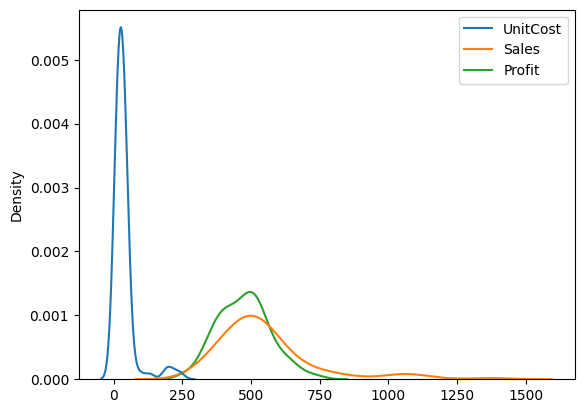

In [30]:
sns.kdeplot(df) #plotting the distribution of the data

In [31]:
df.isnull().sum() #identifying null values

UnitCost    5
Sales       5
Profit      0
dtype: int64

In [32]:
median_imp = df['UnitCost'].median()
df['UnitCost'].fillna(median_imp, inplace=True)

In [33]:
df['UnitCost'].isnull().sum()

0

In [34]:
median_imp2 = df['Sales'].median()
df['Sales'].fillna(median_imp2, inplace=True)

In [35]:
df['Sales'].isnull().sum()

0

In [36]:
df.isnull().sum()

UnitCost    0
Sales       0
Profit      0
dtype: int64

<Axes: ylabel='Density'>

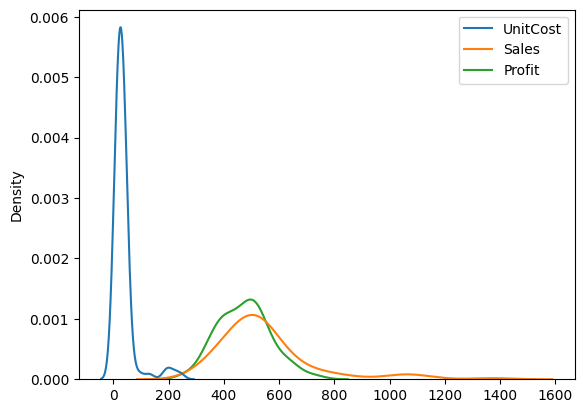

In [37]:
sns.kdeplot(df)

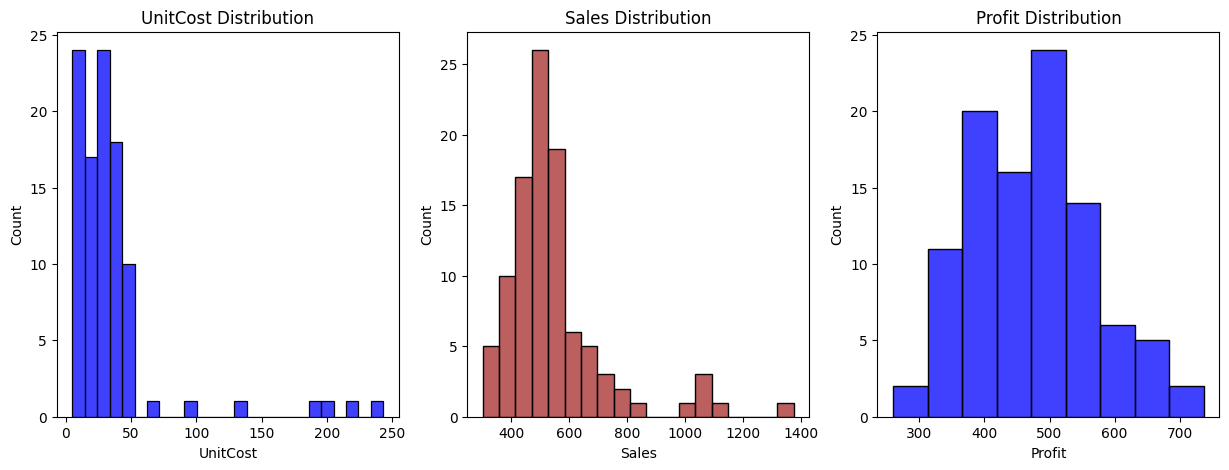

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
gc = ['blue', 'brown', 'blue']

sns.histplot(x='UnitCost', data=df, ax=axes[0], color=gc[0])
axes[0].set_title('UnitCost Distribution')

sns.histplot(x='Sales', data=df, ax=axes[1], color=gc[1])
axes[1].set_title('Sales Distribution')

sns.histplot(x='Profit', data=df, ax=axes[2], color=gc[2])
axes[2].set_title('Profit Distribution')

plt.show()


In [39]:
#detecting outliers in profit column
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['Profit'] < (Q1 - 1.5 * IQR)) | (df['Profit'] > (Q3 + 1.5 * IQR))
num_outliers = outliers.sum()

print('The number of outliers in the Profit column is:',num_outliers)


The number of outliers in the Profit column is: 1


In [40]:
df= df[~outliers]
df

,UnitCost,Sales,Profit
0,21.854305,508.704707,486.850401
1,47.782144,470.099265,422.317121
2,189.698637,1018.352155,471.236350
3,31.939632,301.243109,269.303477
4,12.020839,478.032811,466.011972
...,...,...,...
95,27.220802,418.418971,391.198170
96,28.522977,492.289829,463.766852
97,24.239346,534.115198,509.875852
98,30.719304,1055.338160,521.525219


In [41]:
#detecting outliers in UnitCost column
df['unit_cost'] = np.log(df['UnitCost'])
df

,UnitCost,Sales,Profit,unit_cost
0,21.854305,508.704707,486.850401,3.084398
1,47.782144,470.099265,422.317121,3.866652
2,189.698637,1018.352155,471.236350,5.245437
3,31.939632,301.243109,269.303477,3.463848
4,12.020839,478.032811,466.011972,2.486642
...,...,...,...,...
95,27.220802,418.418971,391.198170,3.303981
96,28.522977,492.289829,463.766852,3.350710
97,24.239346,534.115198,509.875852,3.187977
98,30.719304,1055.338160,521.525219,3.424891


<Axes: xlabel='unit_cost', ylabel='Count'>

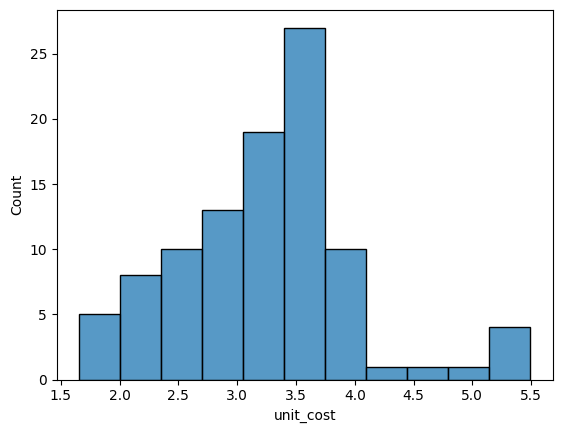

In [42]:
sns.histplot(x='unit_cost',data=df)

In [43]:
Q1 = df['unit_cost'].quantile(0.25)
Q3 = df['unit_cost'].quantile(0.75)
IQR = Q3 - Q1

outliers2 = (df['unit_cost'] < (Q1 - 1.5 * IQR)) | (df['unit_cost'] > (Q3 + 1.5 * IQR))
num_outliers = outliers2.sum()

print('The number of outliers in the unit_cost column is:',num_outliers)


The number of outliers in the unit_cost column is: 4


In [44]:
df= df[~outliers2]
df

,UnitCost,Sales,Profit,unit_cost
0,21.854305,508.704707,486.850401,3.084398
1,47.782144,470.099265,422.317121,3.866652
3,31.939632,301.243109,269.303477,3.463848
4,12.020839,478.032811,466.011972,2.486642
5,28.403061,517.457781,523.691504,3.346497
...,...,...,...,...
95,27.220802,418.418971,391.198170,3.303981
96,28.522977,492.289829,463.766852,3.350710
97,24.239346,534.115198,509.875852,3.187977
98,30.719304,1055.338160,521.525219,3.424891


In [45]:
df['sales'] = np.log(df['Sales'])
df

,UnitCost,Sales,Profit,unit_cost,sales
0,21.854305,508.704707,486.850401,3.084398,6.231868
1,47.782144,470.099265,422.317121,3.866652,6.152944
3,31.939632,301.243109,269.303477,3.463848,5.707918
4,12.020839,478.032811,466.011972,2.486642,6.169679
5,28.403061,517.457781,523.691504,3.346497,6.248928
...,...,...,...,...,...
95,27.220802,418.418971,391.198170,3.303981,6.036483
96,28.522977,492.289829,463.766852,3.350710,6.199068
97,24.239346,534.115198,509.875852,3.187977,6.280612
98,30.719304,1055.338160,521.525219,3.424891,6.961617


<Axes: xlabel='sales', ylabel='Count'>

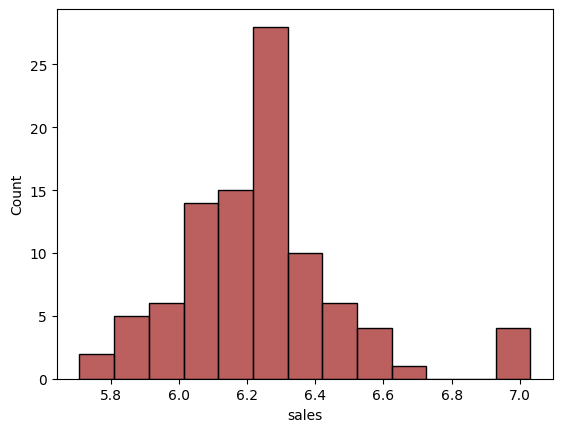

In [46]:
sns.histplot(x='sales',data=df,color='brown')

In [47]:
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

outliers3 = (df['sales'] < (Q1 - 1.5 * IQR)) | (df['sales'] > (Q3 + 1.5 * IQR))
num_outliers = outliers3.sum()

print('The number of outliers in the transformed sales column is:',num_outliers)

The number of outliers in the transformed sales column is: 6


In [48]:
df= df[~outliers3]
df

,UnitCost,Sales,Profit,unit_cost,sales
0,21.854305,508.704707,486.850401,3.084398,6.231868
1,47.782144,470.099265,422.317121,3.866652,6.152944
4,12.020839,478.032811,466.011972,2.486642,6.169679
5,28.403061,517.457781,523.691504,3.346497,6.248928
6,7.613763,647.789405,640.175642,2.029957,6.473566
...,...,...,...,...,...
94,39.693523,411.048557,371.355034,3.681188,6.018711
95,27.220802,418.418971,391.198170,3.303981,6.036483
96,28.522977,492.289829,463.766852,3.350710,6.199068
97,24.239346,534.115198,509.875852,3.187977,6.280612


In [49]:
df.columns

Index(['UnitCost', 'Sales', 'Profit', 'unit_cost', 'sales'], dtype='object')

             Profit  unit_cost     sales
Profit     1.000000  -0.323448  0.815964
unit_cost -0.323448   1.000000 -0.001328
sales      0.815964  -0.001328  1.000000


<Axes: >

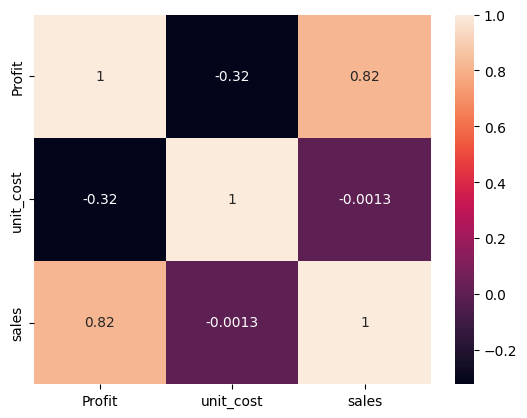

In [50]:
corr = df[['Profit', 'unit_cost', 'sales']].corr(method='pearson')
print(corr)
sns.heatmap(corr, annot=True)